### Importing Needed packages


In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import math
# from sklearn import linear_model
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
%matplotlib inline

### Downloading Data

In [23]:
# !wget -O books2.csv https://raw.githubusercontent.com/heEXDe/some_machine_learning_jupyter_notebooks/main/books2.csv

<h2 id="reading_data">Reading the data in</h2>


In [25]:
df = pd.read_csv("netflix_titles.csv")
df.head(9)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."


As we will be trying to develop a model to predict the average ratings scores for books, and because those scores can have non-integer values, our dependent values will be of the continuous nature.
Lets select some features that we want to use for regression.

In [20]:
cdf = df[['num_pages','ratings_count','text_reviews_count','average_rating']]
print(len(cdf))
cdf.head(10)

8472


,num_pages,ratings_count,text_reviews_count,average_rating
0,652,2095690,27591,4.57
1,870,2153167,29221,4.49
2,352,6333,244,4.42
3,435,2339585,36325,4.56
4,2690,41428,164,4.78
5,152,19,1,3.74
6,3342,28242,808,4.73
7,815,3628,254,4.38
8,815,249558,4080,4.38
9,215,4930,460,4.22


Lets we check if there is a linear correlationn between the independent and dependent daata - 'num_pages' and 'average_rating', 'ratings_count' and 'average_rating', 'text_reviews_count' and 'average_rating':


TypeError: 'value' must be an instance of str or bytes, not a float

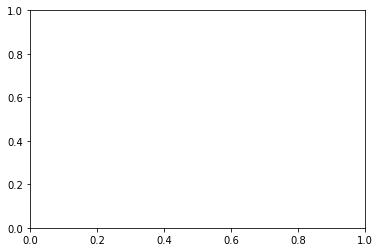

In [21]:
plt.scatter(cdf.num_pages, cdf.average_rating,  color='green')
plt.xlabel("Number of pages")
plt.ylabel("Average rating")
plt.show()

In [ ]:
plt.scatter(cdf.ratings_count, cdf.average_rating,  color='blue')
plt.xlabel("Ratings count")
plt.ylabel("Average rating")
plt.show()

In [ ]:
plt.scatter(cdf.text_reviews_count, cdf.average_rating,  color='red')
plt.xlabel("Text reviews count")
plt.ylabel("Average rating")
plt.show()

Splitting data into 'features' set and 'targets' set and setting the sizes of the train, test and evaluation sets.

In [ ]:
features = cdf.drop(['average_rating'], axis = 1)
# print(features['num_pages'].unique())
targets = cdf.iloc[:, -1]
# print(targets.unique())
train_size = int((.8 * len(cdf))) # 80% of dataset for training; '-1' because of teh use of the 'ceil' method below
val_size = int(math.ceil(.1 * len(cdf)))  # 10% for validation
test_size = int(math.floor((.1 * len(cdf)))) # 10% for testing

Spliting data according to the sizes.

In [ ]:
dataset = TensorDataset(torch.Tensor(np.array(features)).float(), torch.Tensor(targets).long()) # numpy arrays to torch tensors
train_ds, val_ds, test_ds = random_split(cdf, [train_size, val_size, test_size])

Setting the batch size and preparing data loaders.

In [ ]:
batch_size = 100
train_loader = DataLoader(train_ds, batch_size, shuffle = True)
val_loader = DataLoader(val_ds, batch_size, shuffle = True)
test_loader = DataLoader(test_ds, batch_size, shuffle = True)

In [ ]:
input_size = len(cdf.columns) - 1
print(input_size)
output_size = len(targets.unique())
print(output_size)
# threshold = .5

Declaring the model calss.

In [ ]:
class BooksModel(nn.Module):
  
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(input_size, 80),
    self.relu1 = nn.ReLU(),
    self.linear2 = nn.Linear(80, 150),
    self.relu2 = nn.ReLU(),
    self.linear3 = nn.Linear(150, output_size)
  
  def forward(self, xb):
    out = self.linear1(xb)
    out = self.relu1(out)
    out = self.linear2(out)
    out = self.relu2(out)
    out = self.linear3(out)
    return out

Model initiation.

In [ ]:
model = BooksModel()

Training. First - calculating number of epochs.

In [ ]:
n_iters = 8000
num_epochs = n_iters / (len(train_ds) / batch_size)
num_epochs = int(num_epochs)
print(len(train_ds))
print('num_epochs:', num_epochs)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

Process of training:

In [ ]:
"""
for epoch in range(num_epochs):
  for i, (x, y) in enumerate(train_loader):
    outputs = model(x)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  for z, (r, w) in enumerate(val_loader):
    outputs = model(r)
    loss = criterion(outputs, w)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
"""

def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        # Train with batches of data
        print(epoch)
        for xb,yb in train_loader:
            # 1. Generate predictions
            print(xb)
            pred = model(xb)
            # 2. Calculate loss
            loss = criterion(pred, yb)
            # 3. Compute gradients
            loss.backward()
            # 4. Update parameters using gradients
            optimizer.step()
            # 5. Reset the gradients to zero
            optimizer.zero_grad()

        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

fit(num_epochs, model, criterion, optimizer, train_loader)